<a href="https://colab.research.google.com/github/HarishThanikaivelu/MajorProject/blob/Code-main/Copy_of_new_plant_disease__(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/archive.zip_dl=0









Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas
!pip install Keras-Preprocessing 
from tensorflow.keras.utils import img_to_array
import os
from keras_preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
training_data_generator= ImageDataGenerator(zoom_range=0.5, shear_range=0.3, rescale=1/255, horizontal_flip=True)
validation_data_generator= ImageDataGenerator(rescale= 1/255)
train = training_data_generator.flow_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",target_size=(256,256),batch_size=32)
val = validation_data_generator.flow_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",target_size=(256,256),batch_size=32)
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19 
import keras
base_model =VGG19(input_shape=(256,256,3),include_top=False)
for layer in base_model.layers:
  layer.trainable=False
x =Flatten()(base_model.output)
x= Dense(units=38, activation='softmax')(x)
model =Model(base_model.input, x)
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint, EarlyStopping
es =EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
mc =ModelCheckpoint(filepath="best_model.h",monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only=True)
cb=[es,mc]
his = model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)
from keras.callbacks import ModelCheckpoint, EarlyStopping
es =EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
mc =ModelCheckpoint(filepath="best_model.h",monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only=True)
cb=[es,mc]
from keras.models import load_model
model=load_model('/content/best_model.h')
acc =model.evaluate_generator(val)[1]
print(acc)
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
80134624/80134624 [==============================] - 3s 0us/step


<ipython-input-5-c85db684cf45>:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 6.4716 - accuracy: 0.1230
Epoch 1: val_accuracy improved from -inf to 0.15430, saving model to best_model.h


16/16 [==============================] - 28s 1s/step - loss: 6.4716 - accuracy: 0.1230 - val_loss: 4.3234 - val_accuracy: 0.1543
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 3.6777 - accuracy: 0.2461
Epoch 2: val_accuracy improved from 0.15430 to 0.37695, saving model to best_model.h


16/16 [==============================] - 16s 989ms/step - loss: 3.6777 - accuracy: 0.2461 - val_loss: 2.4585 - val_accuracy: 0.3770
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 2.5834 - accuracy: 0.3613
Epoch 3: val_accuracy improved from 0.37695 to 0.41602, saving model to best_model.h


16/16 [==============================] - 15s 970ms/step - loss: 2.5834 - accuracy: 0.3613 - val_loss: 2.3086 - val_accuracy: 0.4160
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 2.3570 - accuracy: 0.4023
Epoch 4: val_accuracy improved from 0.41602 to 0.54102, saving model to best_model.h


16/16 [==============================] - 15s 927ms/step - loss: 2.3570 - accuracy: 0.4023 - val_loss: 1.9532 - val_accuracy: 0.5410
Epoch 5/50
16/16 [==============================] - ETA: 0s - loss: 2.0024 - accuracy: 0.4980
Epoch 5: val_accuracy improved from 0.54102 to 0.60352, saving model to best_model.h


16/16 [==============================] - 16s 1s/step - loss: 2.0024 - accuracy: 0.4980 - val_loss: 1.3515 - val_accuracy: 0.6035
Epoch 6/50
16/16 [==============================] - ETA: 0s - loss: 1.7599 - accuracy: 0.5508
Epoch 6: val_accuracy improved from 0.60352 to 0.60938, saving model to best_model.h


16/16 [==============================] - 16s 992ms/step - loss: 1.7599 - accuracy: 0.5508 - val_loss: 1.5050 - val_accuracy: 0.6094
Epoch 7/50
16/16 [==============================] - ETA: 0s - loss: 1.5578 - accuracy: 0.5977
Epoch 7: val_accuracy did not improve from 0.60938
16/16 [==============================] - 15s 981ms/step - loss: 1.5578 - accuracy: 0.5977 - val_loss: 1.4830 - val_accuracy: 0.5977
Epoch 8/50
16/16 [==============================] - ETA: 0s - loss: 1.7695 - accuracy: 0.5508
Epoch 8: val_accuracy improved from 0.60938 to 0.63867, saving model to best_model.h


16/16 [==============================] - 18s 1s/step - loss: 1.7695 - accuracy: 0.5508 - val_loss: 1.2596 - val_accuracy: 0.6387
Epoch 9/50
16/16 [==============================] - ETA: 0s - loss: 1.5115 - accuracy: 0.6270
Epoch 9: val_accuracy improved from 0.63867 to 0.66602, saving model to best_model.h


16/16 [==============================] - 18s 1s/step - loss: 1.5115 - accuracy: 0.6270 - val_loss: 1.2047 - val_accuracy: 0.6660
Epoch 10/50
16/16 [==============================] - ETA: 0s - loss: 1.6764 - accuracy: 0.5547
Epoch 10: val_accuracy did not improve from 0.66602
16/16 [==============================] - 15s 918ms/step - loss: 1.6764 - accuracy: 0.5547 - val_loss: 1.2633 - val_accuracy: 0.6172
Epoch 11/50
16/16 [==============================] - ETA: 0s - loss: 1.5247 - accuracy: 0.5957
Epoch 11: val_accuracy did not improve from 0.66602
16/16 [==============================] - 14s 869ms/step - loss: 1.5247 - accuracy: 0.5957 - val_loss: 1.7410 - val_accuracy: 0.5566
Epoch 12/50
16/16 [==============================] - ETA: 0s - loss: 1.7331 - accuracy: 0.5723
Epoch 12: val_accuracy improved from 0.66602 to 0.70508, saving model to best_model.h


16/16 [==============================] - 15s 939ms/step - loss: 1.7331 - accuracy: 0.5723 - val_loss: 1.0658 - val_accuracy: 0.7051
Epoch 13/50
16/16 [==============================] - ETA: 0s - loss: 1.4040 - accuracy: 0.6270
Epoch 13: val_accuracy improved from 0.70508 to 0.77344, saving model to best_model.h


16/16 [==============================] - 18s 1s/step - loss: 1.4040 - accuracy: 0.6270 - val_loss: 0.8446 - val_accuracy: 0.7734
Epoch 14/50
16/16 [==============================] - ETA: 0s - loss: 1.3881 - accuracy: 0.6641
Epoch 14: val_accuracy improved from 0.77344 to 0.78125, saving model to best_model.h


16/16 [==============================] - 17s 1s/step - loss: 1.3881 - accuracy: 0.6641 - val_loss: 0.8301 - val_accuracy: 0.7812
Epoch 15/50
16/16 [==============================] - ETA: 0s - loss: 1.1851 - accuracy: 0.6562
Epoch 15: val_accuracy did not improve from 0.78125
16/16 [==============================] - 13s 845ms/step - loss: 1.1851 - accuracy: 0.6562 - val_loss: 0.8965 - val_accuracy: 0.7051
Epoch 16/50
16/16 [==============================] - ETA: 0s - loss: 1.3757 - accuracy: 0.6230
Epoch 16: val_accuracy did not improve from 0.78125
16/16 [==============================] - 13s 849ms/step - loss: 1.3757 - accuracy: 0.6230 - val_loss: 0.7593 - val_accuracy: 0.7715
Epoch 16: early stopping


<ipython-input-5-c85db684cf45>:37: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc =model.evaluate_generator(val)[1]


0.7580241560935974


In [6]:
def prediction(path):
  img=load_img(path,target_size=(256,256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im,axis=0)
  pred =np.argmax(model.predict(img))
  print(pred)  
  print(f"The plant diagnosed as{ref[pred]}")



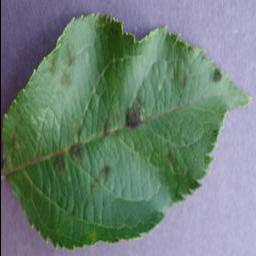

1/1 [==============================] - 2s 2s/step
23
The plant diagnosed asRaspberry___healthy


In [7]:
import numpy as np # used for linear algebra, transformations, etc.
import cv2 as cv # used for computer vision tasks
from google.colab.patches import cv2_imshow
path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG"
img = cv.imread(path)
cv2_imshow(img)
prediction(path)